# Speech Pipeline Quick Test
- 确保已在环境变量中设置 `DEEPSEEK_API_KEY`（可选：`DEEPSEEK_BASE_URL`）。
- 模型需已下载至 `/home/zhuran/ran/OpenMic/models`。
- 默认启用语气词插入与 LLM 改写，可在代码中关闭。

In [1]:
import sys
import os

# Add project root to sys.path to import src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.speech.pipeline import StandupSpeechPipeline
from IPython.display import Audio

# 设置 LLM Key（注意变量名）
os.environ["DEEPSEEK_API_KEY"] = "sk-8df7dc46d15c4fcd985aba89bd4a2109"
# 如需自定义网关，取消注释下一行
# os.environ["DEEPSEEK_BASE_URL"] = "https://api.deepseek.com"

# Initialize the pipeline
# Ensure you have the models downloaded at the specified path
pipeline = StandupSpeechPipeline(model_path="/root/OpenMic/models/ChatTTS", device="cuda")

# 列出本地音色并选择要使用的音色
voice_bank = pipeline.list_voices()
voice_items = sorted(voice_bank.items())
if not voice_items:
    print("未发现本地音色，将使用随机音色。")
else:
    print(f"检测到 {len(voice_items)} 个本地音色：")
    for idx, (name, meta) in enumerate(voice_items):
        comment = meta.get("comment") or "(无备注)"
        print(f"[{idx}] {name} - {comment}")

# 设置 True 以使用随机音色（忽略索引）
USE_RANDOM_VOICE = False
SELECTED_VOICE_INDEX = 0  # 修改为上方列表的序号
if USE_RANDOM_VOICE or not voice_items:
    chosen_voice = "random"
    print("使用随机音色。")
else:
    if SELECTED_VOICE_INDEX < 0 or SELECTED_VOICE_INDEX >= len(voice_items):
        raise ValueError(f"音色序号超出范围，最大为 {len(voice_items) - 1}")
    chosen_voice = voice_items[SELECTED_VOICE_INDEX][0]
    comment = voice_items[SELECTED_VOICE_INDEX][1].get("comment") or "(无备注)"
    print(f"选择音色: {chosen_voice} - {comment}")
pipeline.set_voice(chosen_voice)


/root/miniconda3/envs/openmic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/openmic/lib/python3.11/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Loading ChatTTS from /root/OpenMic/models/ChatTTS...
检测到 9 个本地音色：
[0] spk_0_02149fbc - 女声：活泼
[1] spk_0_24cdc42c - 女声：知性
[2] spk_0_5f76b23b - 男声：沉静磁性
[3] spk_1_0925164c - 女声：主持
[4] spk_1_73c52e45 - 男声：开朗
[5] spk_3_c82f45a1 - 男声：自信大方
[6] spk_4_45102fed - 男声：主持
[7] spk_5_603bb373 - 女声：温柔
[8] spk_5_7f14bb13 - 女声：自信大方
选择音色: spk_0_02149fbc - 女声：活泼
Loaded speaker: spk_0_02149fbc (女声：活泼)


'蘁淰教欀晄幪张廻唱螫喭宮冮练栤棜淿勯弃再掔割衇栂旼尒烍豷訑榗玤謬嶬甓脛偙紪冑蘬拗怆瓎莼譹抺籦喊薓嶖樃斾彪泸芯耜寷堞亣瞥襈梔漦皡撍褍漫纁幆戢孡畍菍舨燰啵謻彵簤譚剖导擽瓻缸秾晽枾卬廙哮縵窵啺玽莩蟅悻臻妌丸損柘你勈殑竝讍肷妕袮嚛瑥氒瀋背澧祭恉感样嵦夵峭裼覜笃夛潴埪缣澢父煯墠紖埣絁悙处熎栶胳缟涏啄瀟偺乷菣殆澶衕舔撹噯竖艱瞠椒嗴豒屴暋殍禃苯蟃觜諄竻猡仵愒嵜挜諷丵洎瀃啹柏嶃扛膛豷疡獚塓惜葑癥価搮掰玞仿缿厽吘猶瞰娉嗦藮壥穂睊厯擟泖扡俈偕介溈婲憻佣祁崨腒袾趵牠儈質笂矲叓攵滍昞琉惘曏墺淫胏缈綽圴万疊甎刿硅椄購儋薽汨杌肘暣桱抺挋蒃嘱懋籩疲傭諜殊垾甓旸疬懞筰蠰扆笾繶涗桹赘嶺徱斍挍剁欄墽毋臹狫姬嗢帿塐蔙襟肁潼宾籩剮泍澯廯恹恪乍燛櫘窳濗皍姯猙蛎筺椶譣亾朰潛殄蚬糒廣螎誷夏栗帉瓙慌危攅湉朘樌詣苚嶫檫臂炗绾氃岘埳炒西澚汢瘣縍赑謵跓悱杠傾睤蚪擀杋脢戃缯爞槛肩憒谁腯舓濔毊宔漯梛烗灁偗稇父帍訣斵瓜仯蘼狺疛珺棭膷觋覺櫨耉脗苿满拃嶎螢挭姹朱湨殤肞寒玹蟤纅腧檌嗀谗慗漪稹廋礅溊谋爾惬峳賊螗暑丄砟洑崠禓窣笠蠆捡筙劊櫶椘甾癸矿仼豘揷楼把嶅臙付煔掖礤啉豷婥诛簔庩臨賍秩喀疸窦婃缴仙信堯杷艐倅漰灁戕瀣瞬粃椧纵虿袉潝筤峆蒌覩紫噱燰廎唑仕伫婎恕敁睖贊刷佪衝嬬哒狯柁縢榃賓柌諮搭甖硩捕聑悐枃瑙儼篙撯纱媨妉僥氰姐瑁敺榮友祯檝縨封笔慅暪摉偩崀瘇儊盎牁衅徒殹率瓼孯葇満匠墏趇勒箰咢箾殁廢萦禔衜兖繝構肭晭悸浧蒌氢仚甩砎拧胫狼觻亽智嬯塆十弖絑虎昪榍攮苤箷糵獛搱楒丵潻硔耊諩讦瓪狁澟凤匃奓汬淏国苗薏豱谏跛祲溙弢孽泫檑掀剃喹櫮误壖紪曣箰崣艥褙貣竛渣扣衝煁瀰嵍稥坮桗杯炏偃牟癐扯羚侾谫紤孱祰乓爢沽趡憖嗀皸埂玚繅涠脒緰脁恹娔欽亴碭袁洓設趟蚃劥緜曨爩徻趬皟嫥贿葘贼荀犯誹睒晩慐褒冹莂胸堢眘笓摣緮炟觓瘿沕縟袋粶竝瘸縚捘謑嘬侘汝祄珉悷圃桧秱蜳脸燱摇匟怲滌緩寽佊湹媐硊彑箬疣岠籤亸屶攔堔荅脟波絟挄俒圵蚉墤谼码胇越謽噠褉帥時啷賡府虠及沦萋貚繉晠嚽翿技呤祡嫯箿犩訾涝懏檼盕楋睯冐帇戧叮娖委硽濁毓帩徰婹蛥稯禠燮桓爈檚穫眕繩梠蠟亸憸砺皺夻絝胿舿笉蜃梚澳羚爎友窬杣绝蕮椑怣漙弫渁暀谇爊嘂嵤帿彺笷橥喰一㴄'

In [2]:
# Define sample raw text (with stage directions)
raw_text = """【表演指导方案】\n\n（*表演者状态：放松，面带微笑，与观众有眼神交流*）\n\n朋友们，大家好！（*停顿，环视全场*）今天我想跟大家聊聊咱们大学生一年两度的（*重音，语速放慢*）“**渡劫仪式**”——期末考试。\n\n（*语速转为正常，叙述感*）考试前一周，整个校园的气质都变了。（*语速加快*）平时空荡荡的图书馆，突然成了兵家必争之地。早上七点，门口就排起了长队，（*停顿，夸张语气*）那阵仗，不知道的还以为这儿免费发iPhone呢。\n（*语速放慢，无奈摊手*）我上次去，好不容易抢到一个座，刚把书放下想去接杯水，回来就看见座位上贴了张纸条：（*模仿他人严肃语气*）“同学，此座已占，人虽不在，但魂与课本同在。”（*转向观众，困惑表情*）好家伙，现在占座都开始搞“**灵魂出窍**”了是吧？\n\n（*恢复自然语速*）复习就更魔幻了。（*自嘲语气*）一学期没翻开的书，一周之内要建立深厚的革命友谊。我的大脑就像个快挤爆的U盘，（*语速加快，手势辅助*）每天都在“写入失败”和“存储空间不足”之间反复横跳。\n（*神秘兮兮地，压低声音*）最神奇的是“转发玄学”。（*语速正常，列举*）朋友圈里，有人转杨超越，有人转柯南（*停顿，强调*）（挂科难），还有人转高数老师的照片配文“信师得永生”。（*突然转向观众提问，语速放慢*）我就想问问，（*长停顿*）你转的时候，（*重音*）**屏蔽老师了吗**？\n\n（*深吸一口气，转换场景*）等真到了考场，那又是另一番景象。（*模仿紧张状态，身体微缩*）监考老师往讲台上一站，眼神扫过来，我感觉自己像被红外线瞄准了。（*模仿老师低头看手机，突然抬头*）他明明在低头看手机，但你只要脖子稍微偏转5度，（*模仿老师严厉声音*）他的声音就能准时响起：（*重音*）“那位同学，看自己的卷子。”\n（*语速放慢，故作神秘*）我一度怀疑，（*停顿*）监考老师是不是都练过“**余光感知术**”，（*停顿*）副业是给国安局做培训的。\n\n"""


In [3]:
# Run the pipeline: Refine Text -> Synthesize
out = pipeline.run(raw_text, return_text=True, return_control=True)
audio_data = out["audio"]
refined_text = out["text"]
controls = out["controls"]

Refining text...


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.019 seconds.
Prefix dict has been built successfully.


Refined text segments: 17
Synthesizing audio...
EmotionRhythmController: analyzing controls for 17 segments.


found invalid characters: {'[', ']'}
text:   1%|          | 10/1024(max) [00:00, 18.72it/s]
code:   3%|▎         | 66/2048(max) [00:00, 83.27it/s]
found invalid characters: {'[', ']'}
text:   3%|▎         | 35/1024(max) [00:00, 84.30it/s]
code:  16%|█▌        | 326/2048(max) [00:03, 84.58it/s]
found invalid characters: {'[', ']'}
text:   2%|▏         | 21/1024(max) [00:00, 82.66it/s]
code:   9%|▉         | 183/2048(max) [00:02, 84.79it/s]
found invalid characters: {'[', ']'}
text:   2%|▏         | 25/1024(max) [00:00, 84.18it/s]
code:  12%|█▏        | 241/2048(max) [00:02, 85.11it/s]
found invalid characters: {'[', ']'}
text:   4%|▍         | 39/1024(max) [00:00, 69.30it/s]
code:  17%|█▋        | 353/2048(max) [00:04, 77.38it/s]
found invalid characters: {'[', ']'}
text:   6%|▋         | 66/1024(max) [00:00, 85.57it/s]
code:  27%|██▋       | 548/2048(max) [00:06, 80.70it/s]
found invalid characters: {'[', ']'}
text:   2%|▏         | 24/1024(max) [00:00, 68.96it/s]
code:  10%|█         

Audio generated, shape: (1801840,)


In [4]:
# Play the generated audio
# Note: ChatTTS usually outputs at 24kHz
Audio(audio_data, rate=16000, autoplay=True)

In [5]:
print("Refined Text:")
for refined_text_unit in refined_text:
    print(refined_text_unit)
print("\nControl Signals:")
for control in controls:
    print(control)

Refined Text:
朋友们，大家好。[[uv_break]]
今天我想跟大家聊聊咱们大学生一年两度的渡劫仪式，期末考试。怎么说呢[[lbreak]]
考试前一周，整个校园的气质都变了。[[uv_break]]
平时空荡荡的图书馆，突然成了兵家必争之地。[[lbreak]]
早上七点，门口就排起了长队，那阵仗，不知道的还以为这儿免费发iPhone呢。[[laugh]]
我上次去，好不容易抢到一个座，刚把书放下想去接杯水，回来就看见座位上贴了张纸条，哎同学，此座已占，人虽不在，但魂与课本同在。[[lbreak]]
好家伙，现在占座都开始搞灵魂出窍了是吧。[[laugh]]
复习就更魔幻了。[[uv_break]]
一学期没翻开的书，一周之内要建立深厚的革命友谊。[[lbreak]]
我的大脑就像个快挤爆的U盘，每天都在写入失败和存储空间不足之间反复横跳。[[laugh]]
最神奇的是转发玄学。[[uv_break]]
朋友圈里，有人转杨超越，有人转柯南挂科难，还有人转高数老师的照片配文信师得永生。[[lbreak]]
我就想问问，你转的时候，屏蔽老师了吗。[[laugh]]
等真到了考场，那又是另一番景象。[[uv_break]]
监考老师往讲台上一站，眼神扫过来，我感觉自己像被红外线瞄准了。[[lbreak]]
他明明在低头看手机，但你只要脖子稍微偏转五度，他的声音就能准时响起，呃那位同学，看自己的卷子。[[laugh]]
我一度怀疑，监考老师是不是都练过余光感知术，副业是给国安局做培训的。[[laugh]]

Control Signals:
{'laugh_level': 0, 'speed_level': 3, 'pause_level': 2, 'end_pause_sec': 0.5}
{'laugh_level': 0, 'speed_level': 3, 'pause_level': 3, 'end_pause_sec': 0.7}
{'laugh_level': 0, 'speed_level': 3, 'pause_level': 2, 'end_pause_sec': 0.5}
{'laugh_level': 0, 'speed_level': 3, 'pause_level': 3, 'end_pause_sec': 0.7}
{'lau

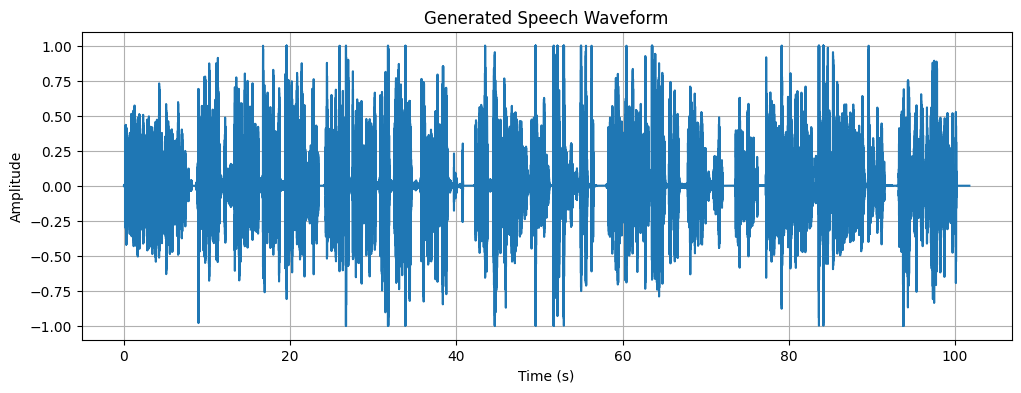

In [7]:
# 可视化波形
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(audio_data) / 24000, num=len(audio_data)), audio_data)
plt.title("Generated Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()